### 微分方程式の数値解法

微分を差分で置き換えて、漸化式を作る。例は最も単純なEuler法を使い、より精度の高い方法についてはライブラリを用いる。
$$
\frac{dx}{dt} = px 
$$
時間を幅$\Delta t$に分割して離散化する。$t_n=n\Delta t (n=1,\cdots , N)$　
時刻$t_n$におけるxの値を数列$x_n$で表す。
$$x_n = x(t_n) = x(n\Delta t)$$
微分方程式に含まれる微分を差分で表す。
$$
\frac{dx}{dt} = \frac{x(t+\Delta t)-x(t)}{\Delta t} \rightarrow \frac{x_{n+1}-x_n}{\Delta t}
$$
$$
\frac{x_{n+1}-x_n}{\Delta t} = px_n \rightarrow x_{n+1} = x_n + p x_n \Delta t
$$
1階の微分方程式は2項間の漸化式になるので、初期条件を与えれば、順次数値を求めることができる。

Text(0, 0.5, 'x')

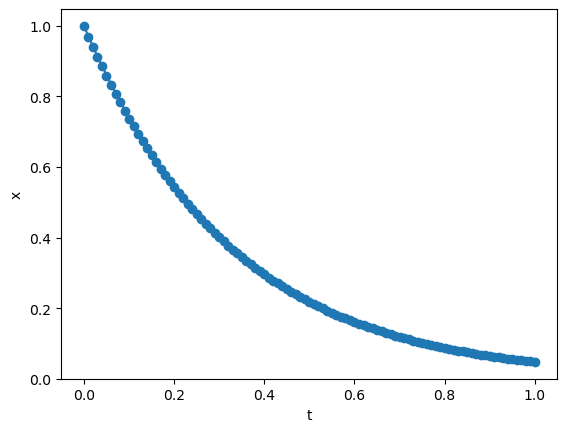

In [1]:
#
import matplotlib.pyplot as plt 
import numpy as np 

p = -3
N = 100
delta = 1/N
x0 = 1
t = 0
T = [t]
X = [x0]
for i in range(N):
    t = t + delta
    x = x0 + p*x0*delta 
    T.append(t)
    X.append(x)
    x0 = x 
t = np.linspace(0, 1, N)
y = np.exp(p*t)
plt.scatter(T, X)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('x')




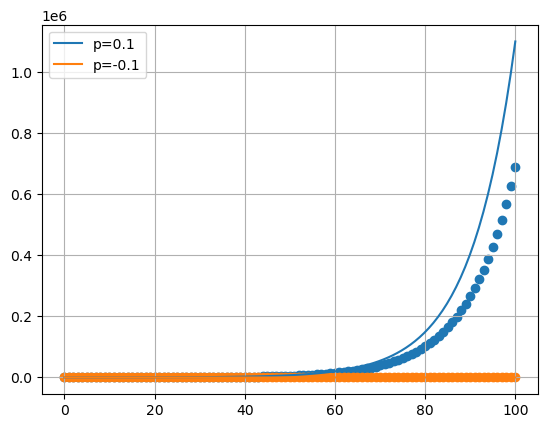

In [2]:
y0 = 50
N = 100
delta = 100/N
t = np.linspace(0, 100, N)
y1 = y0*np.exp(0.1*t)
y2 = y0*np.exp(-0.1*t)


def solve(y0, p):
    t = 0
    y = y0
    T = [t]
    Y = [y]
    for i in range(N):
        y += p*y*delta
        t += delta 
        T.append(t)
        Y.append(y)
    plt.scatter(T, Y)
    #plt.show()
solve(y0, 0.1)
solve(y0, -0.1)
plt.plot(t, y1, label='p=0.1')
plt.plot(t, y2, label='p=-0.1')
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()


微分方程式を精度よく解くためのライブラリはscipy.integrate にあり、solve_ivp (initial value problem) が使える。 
[scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html)

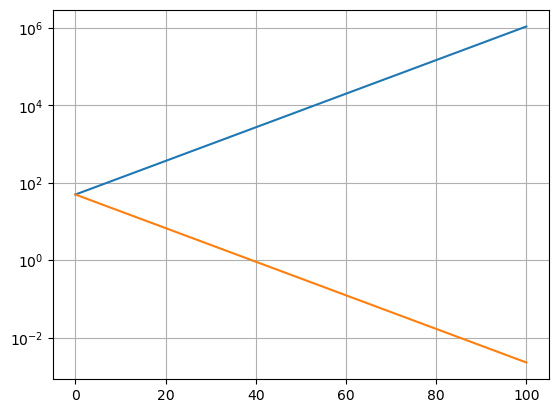

In [3]:
from scipy.integrate import solve_ivp

def dydt(t, y, p): return p*y
t0 = 0
tmax = 100
y0 = 50
T = np.linspace(0, 100)
sol1 = solve_ivp(dydt, [t0, tmax], [y0], t_eval=T, args=(0.1,))
sol2 = solve_ivp(dydt, [t0, tmax], [y0], t_eval=T, args=(-0.1,))
plt.plot(sol1.t, sol1.y[0])
plt.plot(sol2.t, sol2.y[0])
plt.yscale('log')
plt.grid()

### 課題２　落体の運動
速度に比例する抵抗力を受けながら落下する物体の速度および位置の時間変化を求める。ただし、$m=0.2$ kg, g=9.8 $m/s^2$
座標は鉛直下向きを正とし、抵抗力の比例定数を$k$とすると、運動方程式は
$$
m\frac{dv}{dt} = mg -kv
$$
$$v(t+\Delta t) = v(t) + \left(g-\frac{k}{m}v(t)\right)\Delta t
$$
$$
v_{n+1} = v_{n} + (g-\frac{k}{m}v_n)\times \Delta t
$$
速度の定義は
$$
\frac{dy}{dt} = v \rightarrow y(t+\Delta t) -y(t) = v(t)\Delta t \rightarrow y_{n+1} = y_n + v_n \Delta t
$$


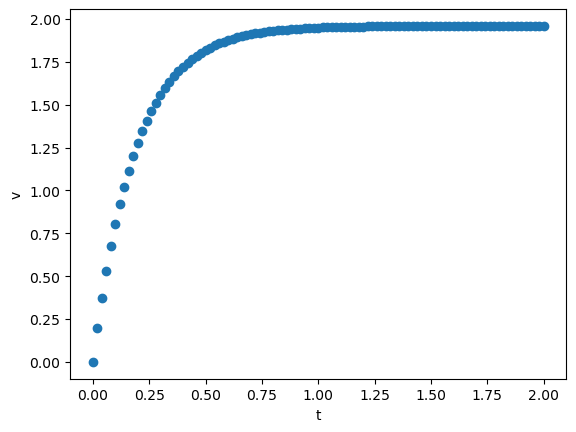

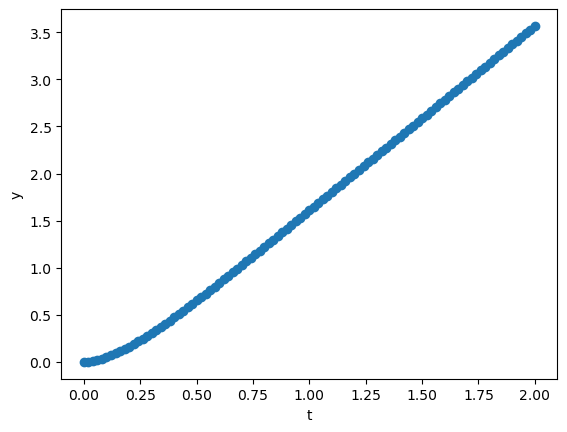

In [4]:
g = 9.8
m = 0.2
dt = 1/50
t0 = 0
tmax = 2
N = int(tmax / dt) 
t = 0
v = 0
k = 1
y = 0
T = [t]
V = [v]
Y = [y]
for i in range(N):
    t += dt 
    v += (g-k/m*v)*dt
    y += v*dt 
    V.append(v)
    T.append(t)
    Y.append(y)
plt.scatter(T, V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()
plt.scatter(T, Y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### 課題3　化学反応の問題
次のような化学平衡を考える
$$
\rm{A+B} \overset{k_1}{\underset{k_2}{\rightleftharpoons}} \rm{C}
$$
A,B,Cの濃度を$x=[A], y=[B], z=[C]$ とおいて、反応速度についての微分方程式を考える。
$$
\frac{dx}{dt} = -k_1 xy + k_2 z
$$
$$
\frac{dy}{dt} = -k_1 xy + k_2 z
$$
$$
\frac{dz}{dt} = k_1 xy - k_2 z
$$
差分化して漸化式に置き換えると
$$
x_{n+1} = x_n +(-k_1x_ny_n+k_2 z_n)\Delta t
$$
$$
y_{n+1} = y_n +(-k_1x_ny_n+k_2 z_n)\Delta t
$$
$$
z_{n+1} = z_n +(k_1x_ny_n-k_2 z_n)\Delta t
$$
速度定数$k_1=0.1, k_2=0.1$と初期条件$t=0, [A]=20, [B]=30, [C]=0$が与えられたとき、$\Delta t=0.02$として
速度変化が十分小さくなるまで計算せよ。（収束の基準は2項の差が$10^{-3}$より小さいなどと設定する）

結果の吟味：
収束した状態では微分方程式の時間微分が0となるので、右辺を0とおいた式から平衡状態の濃度について
$$
K = \frac{k_1}{k_2} = \frac{[C]}{[A][B]}
$$
$t=0$での濃度が$A_0,B_0,C_0$であり、平衡状態で$A_0-\alpha, B_0-\alpha, C_0+\alpha$となったとすると、
$$
\frac{C_0+\alpha}{(A_0-\alpha)(B_0-\alpha)} = K \leftrightarrow \alpha^2 -(A_0+B_0+\frac{1}{K})\alpha + A_0B_0-\frac{C_0}{K}=0
$$
この2次方程式を解くだけで平衡状態の濃度は求まる。解は2つあるが、$A_0-\alpha \geq 0, B_0-\alpha \geq 0, C_0+\alpha \geq 0$を満たすものが求める濃度である。微分方程式の収束した値と一致することを確かめよ。

8.099999999999916 1.5887916077994717 11.588791607799484 18.411208392200525


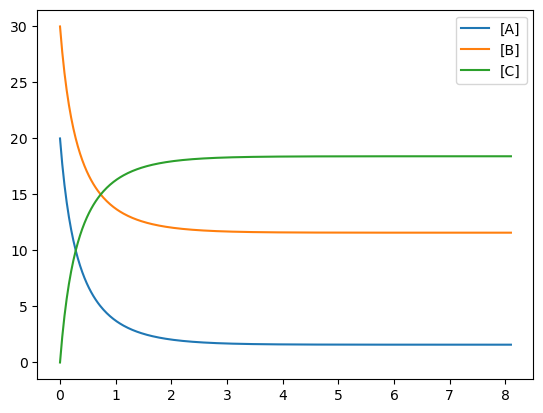

In [5]:
import numpy as np
import matplotlib.pyplot as plt
k1 = 0.1
k2 = 0.1
dt = 0.02
eps = 1e-4
t = 0
x = 20
y = 30
z = 0
T = [t]
X = [x]
Y = [y]
Z = [z]
while True:
    t += dt
    lhs = -k1*x*y+k2*z 
    dx = lhs*dt
    dy = dx 
    dz = -dx 
    x += dx
    y += dy
    z += dz
    T.append(t)
    X.append(x)
    Y.append(y)
    Z.append(z)
    if abs(lhs) < eps:
        break
plt.plot(T, X, label='[A]')
plt.plot(T, Y, label='[B]')
plt.plot(T, Z, label='[C]')
plt.legend()
print(T[-1],X[-1],Y[-1],Z[-1])



In [6]:
# 収束値を2次方程式で求める
A0 = 20
B0 = 30
C0 = 0
K = k1/k2
a = 1
b = -(A0+B0+1/K)
c = A0*B0-C0/K
det = b**2-4*a*c 
x1 = (-b-np.sqrt(det))/2/a
x2 = (-b+np.sqrt(det))/2/a
print(x1, x2)
A1 = A0 - x1
B1 = B0 - x1
C1 = C0 + x1
print(A1, B1, C1) 

18.411276560621086 32.58872343937891
1.5887234393789136 11.588723439378914 18.411276560621086


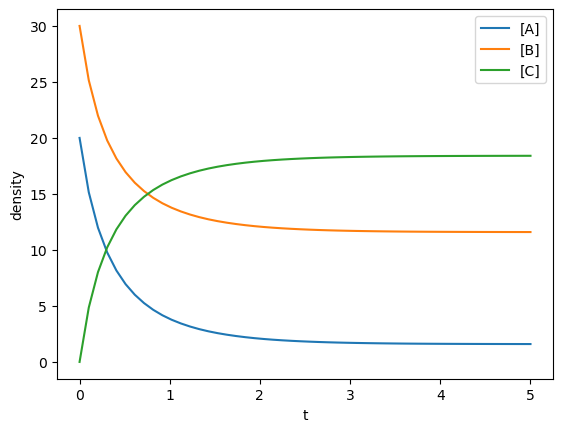

In [7]:
# scipy.integrate で解く
from scipy.integrate import solve_ivp
def dydt(t, Y, k1, k2):
    x, y, z = Y
    return [-k1*x*y+k2*z,-k1*x*y+k2*z, k1*x*y-k2*z] 

tspan = [0, 5]
Y0 = [20, 30, 0]
t_eval = np.linspace(0, 5)
sol = solve_ivp(dydt, tspan, Y0, t_eval=t_eval, args=(k1,k2,))
plt.plot(sol.t, sol.y[0],label='[A]')
plt.plot(sol.t, sol.y[1],label='[B]')
plt.plot(sol.t, sol.y[2],label='[C]')
plt.xlabel('t')
plt.ylabel('density')
plt.legend()

### 選択問題1　力学の問題
速度に比例する空気抵抗がある場合に斜方投射を考える。物体の質量を$m=0.005$kg, 空気抵抗の比例定数を$k=0.01$ kg/s とする。スタート地点を地面から高さ1.8ｍの位置とし、仰角30度で初速は30m/s とする。重力加速度を$g=9.8 m/s^2$とする。

水平方向にｘ軸、鉛直上向きにｙ軸を取り、原点は地面の高さとする。速度の成分を$(u,v)$とすると、運動方程式は
$$
m\frac{du}{dt} = -ku, \quad m\frac{dv}{dt} = -mg -kv
$$
$$
\frac{dx}{dt} = u, \quad \frac{dy}{dt} = v
$$
$$
u_{n+1} = u_n -\frac{k}{m}u_n\Delta t, \quad v_{n+1} = v_n -\left(g+\frac{k}{m}v_n\right)\Delta t
$$
$$
x_{n+1}=x_n + u_n\Delta t, \quad y_{n+1} = y_n + v_n \Delta t
$$

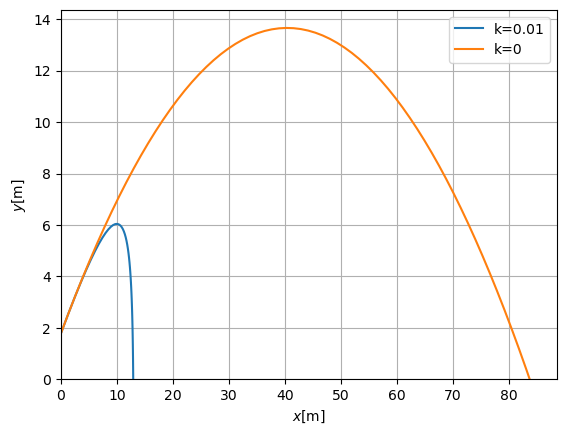

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import radians, sin, cos 
def solve(k=0.01, V0=30, deg=30):
    m = 0.005
    g = 9.8
    theta = radians(deg)
    t = 0
    dt = 0.05
    x = 0
    y = 1.8
    u = V0*cos(theta)
    v = V0*sin(theta)
    T = [t]
    X = [x]
    Y = [y]
    U = [u]
    V = [v]
    while y >= 0:
        du = -k/m*u*dt
        dv = -(g+k/m*v)*dt 
        dx = u*dt
        dy = v*dt
        u += du
        v += dv 
        x += dx 
        y += dy
        t += dt
        T.append(t)
        X.append(x)
        Y.append(y)
        U.append(u)
        V.append(v)
    plt.plot(X, Y,label=f'k={k}')
    plt.xlabel('$x$[m]')
    plt.ylabel('$y$[m]')
    
solve(k=0.01,deg=30)
solve(k=0,deg=30)
plt.legend()
plt.grid()
plt.xlim(0,)
plt.ylim(0,)
plt.show()

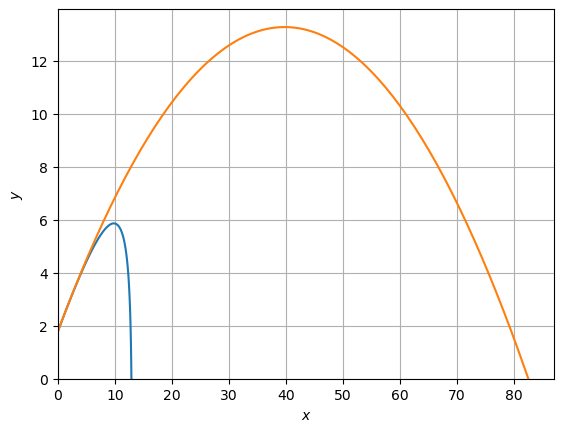

In [9]:
# scipy.integrate で解く
def deriv(t, Z, m, k):
    g = 9.8
    u, v, x, y = Z
    return [-k/m*u, -(g+k/m*v), u, v]

def ground(t, Z, m, k):
    return Z[3] + 0.3  # stop if y = 0

ground.terminal = True

def solveivp(k=0.01, V0=30, deg=30):
    theta = radians(deg)
    h = 1.8
    m = 0.005
    tmax = 5
    t_span = [0, tmax]
    t_eval = np.linspace(0, tmax, 200)
    Z0 = [V0*cos(theta), V0*sin(theta), 0, h]
    sol = solve_ivp(deriv, t_span, Z0, t_eval=t_eval, events=ground, args=(m, k,))
    plt.plot(sol.y[2], sol.y[3])
    plt.xlabel('$x$')
    plt.ylabel('$y$')
solveivp()
solveivp(k=0)
plt.xlim(0, )
plt.ylim(0, )
plt.grid()
plt.show()

### 選択問題2　伝染病流行のモデル（SIRモデル）
全人口を$N$として、次の3種類に分類できるとする。（コンパートメントモデル）
* S (Susceptive: 感染する可能性がある)
* I (Infected: 感染していてかつ感染させる能力がある)
* R (Recovered:　病気からの回復による免疫保持者または隔離者、死亡者)
化学反応式のように書くと$S \rightarrow I \rightarrow R$ のように状態を移行し、$S+I+R=N$が常に成り立つ。
$$
\frac{dS}{dt} = -\beta S I, \quad \frac{dI}{dt} = \beta SI -\gamma I, \quad \frac{dR}{dt} = \gamma I
$$
差分に直すと
$$
S_{n+1} = S_{n} -\beta S_n I_n \Delta t, \quad I_{n+1} = I_n + (\beta S_n - \gamma )I_n \Delta t,
\quad R_{n+1} = R_n + \gamma I_n \Delta t 
$$
となり、パラメータ$\beta$（感染率）, $\gamma$（隔離率）と初期条件$(S(0), I(0), R(0))$を与えれば解ける。
$N=10000, \beta = 0.002, \gamma = 1$ として解いてみる。

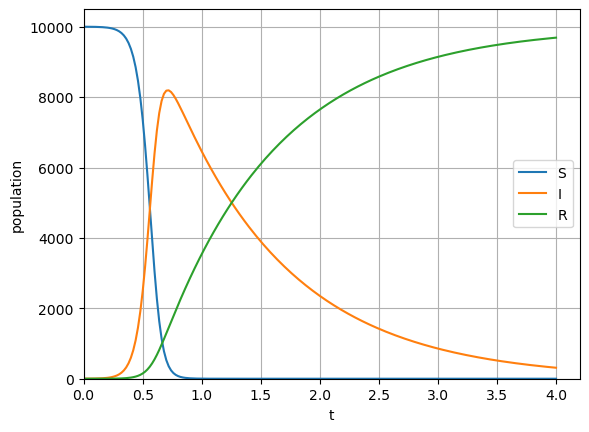

In [10]:
N = 10000
beta = 0.002
gamma = 1
m = 1  #t=0 での感染者数

def SIR(beta=0.002, gamma=1, m=1):
    t = 0
    s = N-m
    i = m
    r = 0
    dt = 0.02
    T = [t]
    S = [s]
    I = [i]
    R = [r]
    for n in range(200):
        ds = -beta * s * i * dt
        di = (beta * s - gamma) * i * dt 
        dr = gamma * i * dt
        s += ds
        i += di
        r += dr
        t += dt 
        T.append(t)
        S.append(s)
        I.append(i)
        R.append(r)
    plt.plot(T, S, label='S')
    plt.plot(T, I, label='I')
    plt.plot(T, R, label='R')
    plt.xlabel('t')
    plt.ylabel('population')
    plt.legend()
    plt.grid()
    plt.xlim(0, )
    plt.ylim(0, )
    plt.show()
SIR()

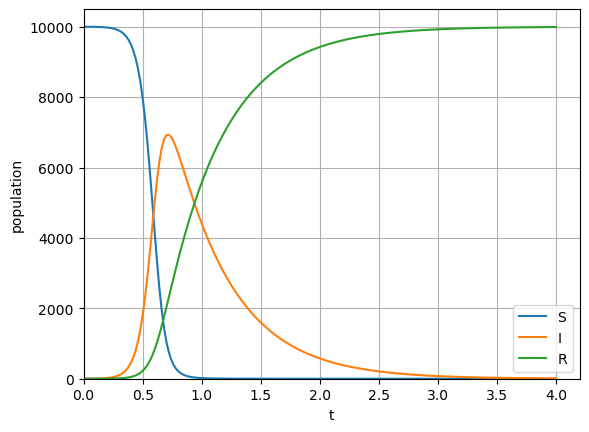

In [11]:
SIR(gamma=beta*N/10)

In [12]:
# scipy.integrate
def deriv(t, z, beta, gamma):
    s, i, r = z 
    return [-beta*s*i, beta*s*i-gamma*i, gamma*i]
tmax=4
tspan = [0, tmax]
teval = np.linspace(0, tmax, 200)
N = 10000
m = 1
beta = 0.002
gamma = 1
z0 = [N - m, m, 0]
sol = solve_ivp(deriv, tspan, z0, t_eval=teval, args=(beta, gamma,))

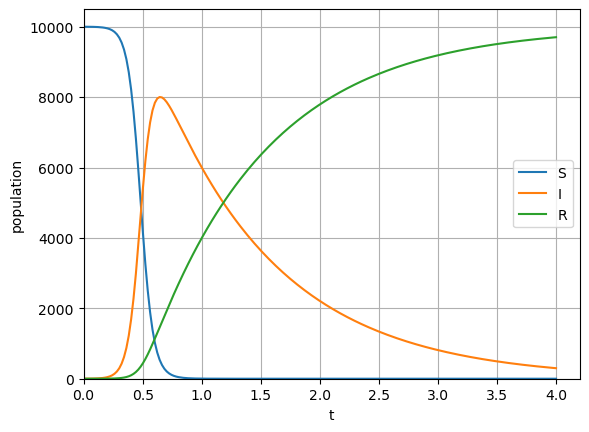

In [13]:
plt.plot(sol.t, sol.y[0], label='S')
plt.plot(sol.t, sol.y[1], label='I')
plt.plot(sol.t, sol.y[2], label='R')
plt.legend()
plt.xlim(0, )
plt.ylim(0, )
plt.xlabel('t')
plt.ylabel('population')
plt.grid()


### 選択問題3 食う、食われる関係
$x, y$はそれぞれ被食者（例：草食動物）、捕食者（例：肉食動物）の個体数を表す。
$$
\frac{dx}{dt} = (r-ay)x, \quad \frac{dy}{dt} = (bx-c)y
$$
Lotka-Volterra 方程式といい、2つの個体数が振動する単純な系である。
パラメター　$r=1, a=0.03, b=0.025, c=1$として、適当な初期条件$(x(0)=100, y(0)=1)$に対して、微分方程式を解き、
$x, y$の時間変化のグラフを作れ。
このような非線形な微分方程式は硬い方程式といわれ誤差の影響が大きいので、Euler法では相当小さいステップにしないとずれが大きい。正確に解くと、周期解（xy平面で閉曲線）となる。

In [14]:
# scipy.integrate で解く
r = 1
a = 0.03
b = 0.025
c = 1
def deriv(t, z, r, a, b, c):
    x, y = z 
    return [(r-a*y)*x, (b*x-c)*y]
tmax = 30
tspan = [0, tmax]
teval = np.linspace(0, tmax, 500)
z0 = [100, 1]
sol = solve_ivp(deriv, tspan, z0, t_eval=teval, args=(r,a,b,c))

Text(0, 0.5, 'x,y')

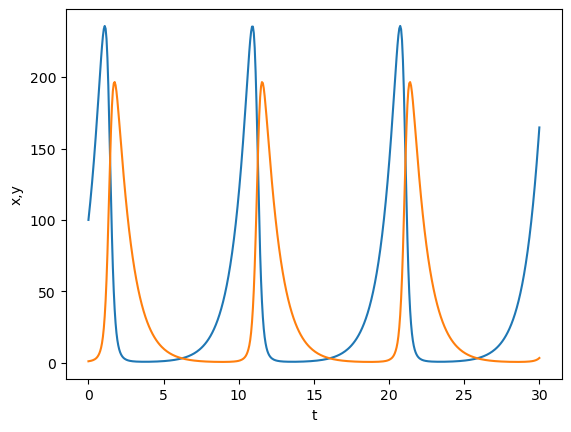

In [15]:
plt.plot(sol.t, sol.y[0],label='x')
plt.plot(sol.t, sol.y[1],label='y')
plt.xlabel('t')
plt.ylabel('x,y')

Text(0, 0.5, 'y')

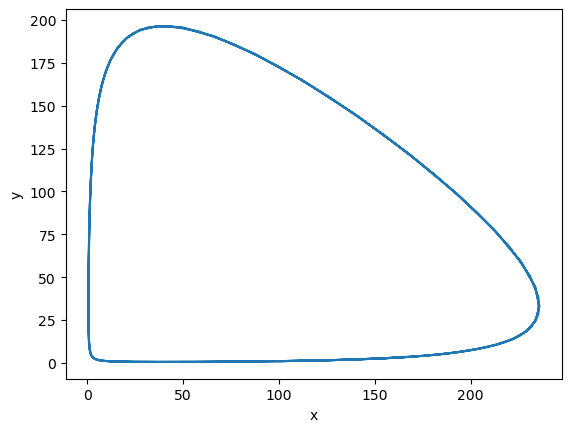

In [16]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x')
plt.ylabel('y')

### 付録：単振動
質量$m$の物体をばね定数$k$のばねにつないで振動させたとき、運動方程式は
$$
m\frac{d^2x}{dt^2} = -kx, \quad \frac{d^2x}{dt^2} = -\omega^2 x, \quad \omega^2 = \frac{k}{m}
$$
ここで、$v=\frac{dx}{dt}$ とおくと、
$$
\frac{dv}{dt} = -\omega^2 x, \quad \frac{dx}{dt} = v
$$
となる。これも誤差が出やすく、Euler法で解くと振幅がだんだん大きくなってしまう。

簡単のため、$\omega=1 ,x(0)=1, v(0)=0$の場合を解く。この解は
$$
x(t) = \cos{t}, \quad v(t) = -\sin{t}
$$ 
である。

In [17]:
def deriv(t, y, omega):
    v, x = y 
    return [-omega**2*x, v]
omega = 1
tmax = 4*np.pi
tspan = [0, tmax]
teval = np.linspace(0, tmax, 200)
y0 = [0, 1]
sol = solve_ivp(deriv, tspan, y0, t_eval=teval, args=(omega, ))

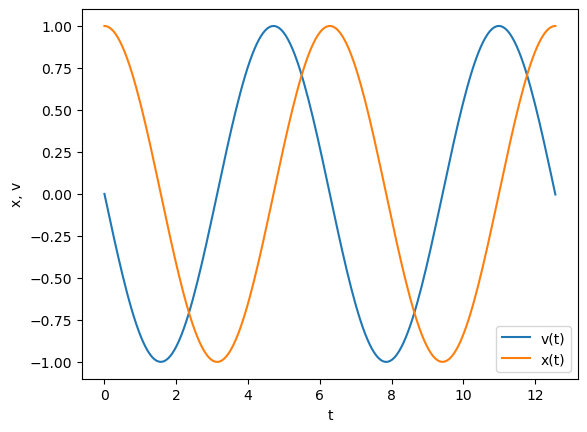

In [18]:
plt.plot(sol.t, sol.y[0],label='v(t)')
plt.plot(sol.t, sol.y[1],label='x(t)')
plt.xlabel('t')
plt.ylabel('x, v')
plt.legend()

Text(0, 0.5, 'x')

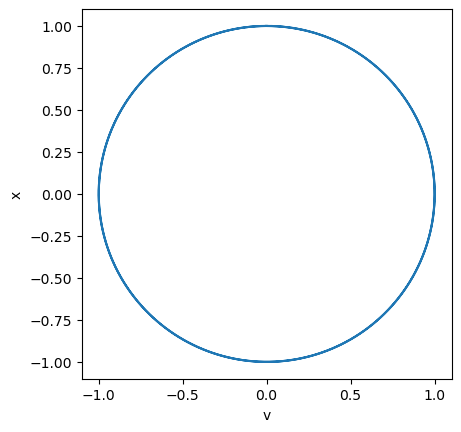

In [19]:
plt.plot(sol.y[0], sol.y[1])
plt.axis('square')
plt.xlabel('v')
plt.ylabel('x')

In [ ]:
# チャレンジ課題
# p5.ipynb を参考にipywidgets を使ってパラメータをスライダーで変えられるようにプログラムを改変してみよう
# グラフを描くまでのプロセスを関数にし、変えたいパラメータを引数にする
# interactive(func, a=widgets.FloatSlider()) のように呼び出す

# 力学の問題で斜方投射の速度を一定にして角度を変化させる
# SIRモデルで初期感染者数を変える。γ、βを変えられるようにする。
# 食う食われる系でパラメータや初期個体数を変えられるようにする